In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [12]:
data_train_path='Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/Fruits_Vegetables/validation'

In [13]:
img_width=180
img_height=180

In [14]:
import tensorflow as tf

data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'  # <-- adjust this path to your folder
img_width = 180
img_height = 180

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)


Found 3115 files belonging to 36 classes.


In [15]:
data_cat = data_train.class_names

In [42]:
data_cat


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [16]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                      image_size=(img_height,img_width),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      validation_split=False)

Found 351 files belonging to 36 classes.


In [17]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                      image_size=(img_height,img_width),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      validation_split=False)

Found 359 files belonging to 36 classes.


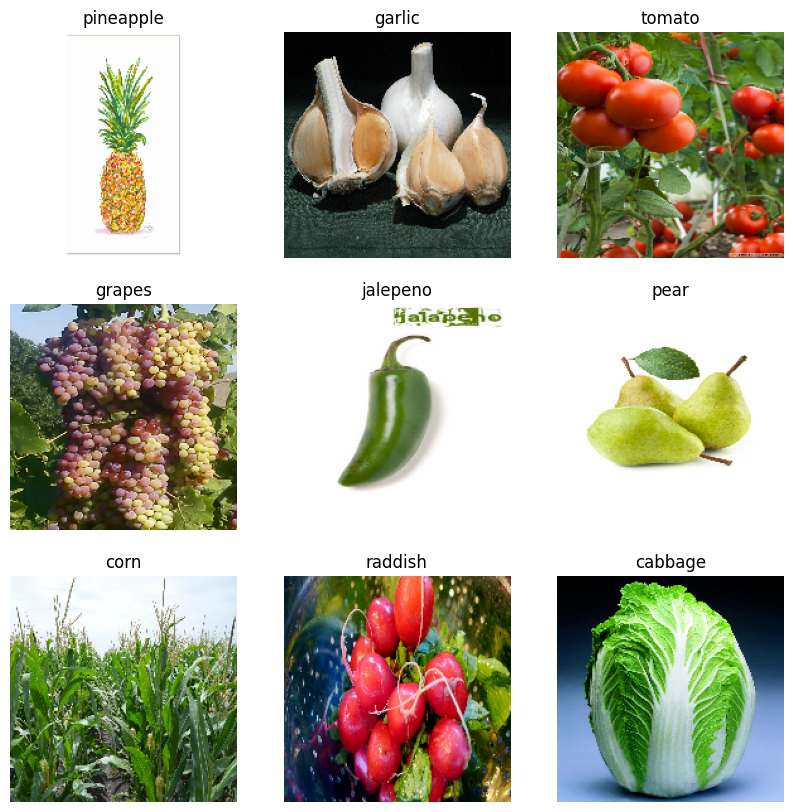

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



In [23]:
data_train 

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
model = Sequential([
    layers.Rescaling(1./255),                         # Normalize pixel values (0-255 to 0-1)
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),  # Convolutional layer 1
    layers.MaxPooling2D(),                                    # Downsampling
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # Convolutional layer 2
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # Convolutional layer 3
    layers.MaxPooling2D(),
    
    layers.Flatten(),                              # Flatten feature maps to 1D
    layers.Dropout(0.2),                           # Prevent overfitting
    layers.Dense(128, activation='relu'),          # Dense (fully connected) layer
    layers.Dense(units=len(data_cat))              # Output layer (number of classes)
]) 


In [26]:
 model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [27]:
epochs_size = 25  # Or any number of epochs you want
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 333ms/step - accuracy: 0.0395 - loss: 3.6481 - val_accuracy: 0.1311 - val_loss: 3.0981
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 346ms/step - accuracy: 0.1428 - loss: 3.0257 - val_accuracy: 0.4160 - val_loss: 2.1191
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.3083 - loss: 2.3845 - val_accuracy: 0.5128 - val_loss: 1.6296
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.3985 - loss: 2.0441 - val_accuracy: 0.6724 - val_loss: 1.2097
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 335ms/step - accuracy: 0.5056 - loss: 1.6635 - val_accuracy: 0.7835 - val_loss: 0.8684
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.6529 - loss: 1.2184 - val_accuracy: 0.8291 - val_loss: 0.7407
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - accuracy: 0.7461 - loss: 0.8359 - val_accuracy: 0.9117 - val_loss: 0.4952
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.8478 - loss: 0.5186 - val_accu

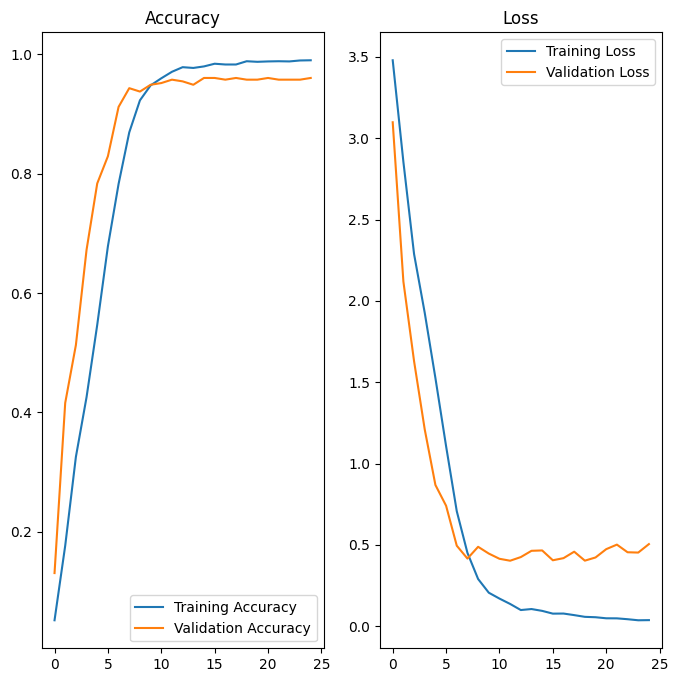

In [28]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [37]:
image = 'chilli.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [38]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [39]:
score = tf.nn.softmax(predict)

In [40]:
import numpy as np
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is raddish with accuracy of 37.95


In [41]:
model.save('Image_classify.keras')